# ML 101

## Select $k$ in K-means

In [11]:
!pip install git+git://github.com/mariolpantunes/knee@main#egg=knee

  Cloning git://github.com/mariolpantunes/knee (to revision main) to /tmp/pip-install-d8nd4oyv/knee_f969437701384beeafb6b91df3afd25c
  Running command git clone -q git://github.com/mariolpantunes/knee /tmp/pip-install-d8nd4oyv/knee_f969437701384beeafb6b91df3afd25c
  Cloning git://github.com/mariolpantunes/uts (to revision main) to /tmp/pip-install-d8nd4oyv/uts_38b27cb90fab4ef48754b10d477dd452
  Running command git clone -q git://github.com/mariolpantunes/uts /tmp/pip-install-d8nd4oyv/uts_38b27cb90fab4ef48754b10d477dd452
     |████████████████████████████████| 15.7 MB 5.1 MB/s 
  Created wheel for knee: filename=knee-0.1-py3-none-any.whl size=47016 sha256=64ecb97e211f1c39349b01d0885e8275328d0299bf72baf303815c528c6013ef
  Stored in directory: /tmp/pip-ephem-wheel-cache-yvv3xtln/wheels/b9/4f/7a/9455b1b9019968ca9794c92bd711c37620d4da7e71dd9cbae0
  Created wheel for uts: filename=uts-0.1-py3-none-any.whl size=12819 sha256=c6a80a69050123107933d35570d741fda2a40c121f6a72b0f3fe6bd3493346f5
  St

In [5]:
%matplotlib inline
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 8]

from sklearn import cluster, datasets, mixture

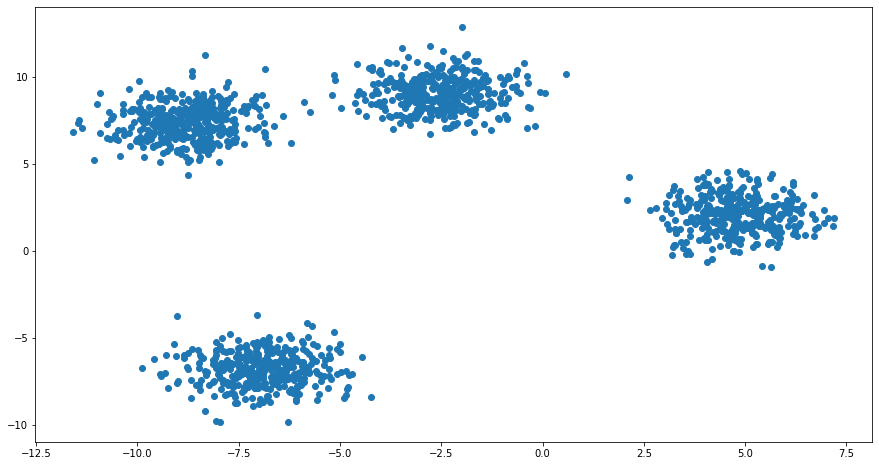

In [14]:
# Generate the datasets

n_samples = 1500
centers = 4
blobs = datasets.make_blobs(n_samples=n_samples, centers=centers, random_state=42)

x = blobs[0][:,0]
y = blobs[0][:,1]
plt.plot(x, y, 'o')
plt.show()

## K-Means



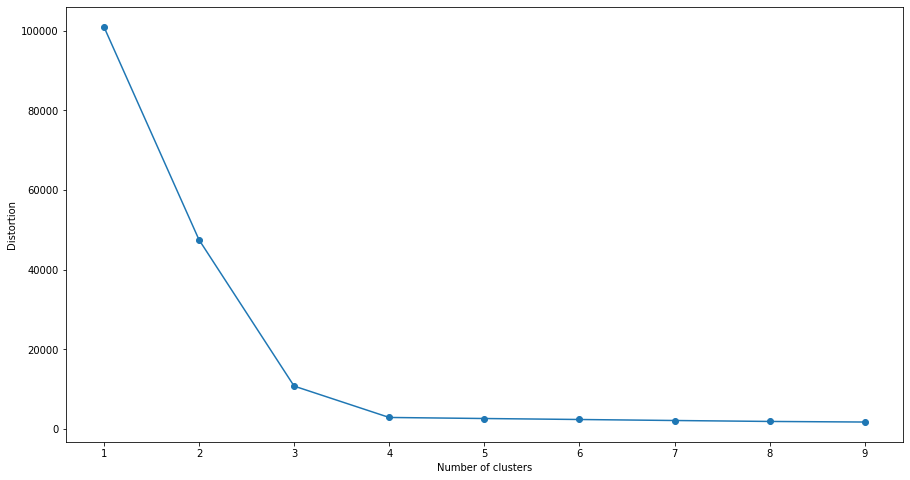

In [15]:
k = [1, 2, 3, 4, 5, 6, 7, 8, 9]
X = blobs[0]

distortions = []

for i in range(len(k)):
  clustering = cluster.KMeans(n_clusters=k[i], random_state=0).fit(X)
  distortions.append(clustering.inertia_)

plt.plot(k, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

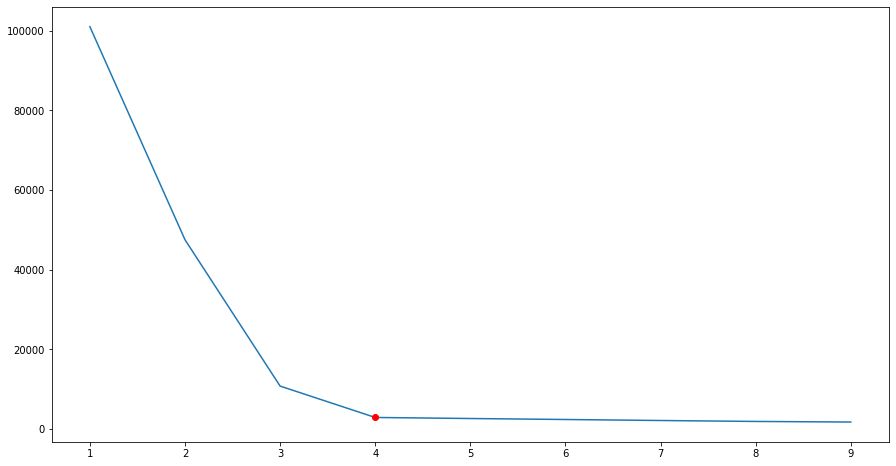

In [19]:
import numpy as np
import knee.kneedle as kneedle

x = np.array(k)
y = np.array(distortions)

# generate the points
points = np.array([x,y]).T

idx = kneedle.auto_knee(points)

plt.plot(x,y)
plt.plot(x[idx], y[idx], 'ro')
plt.show()

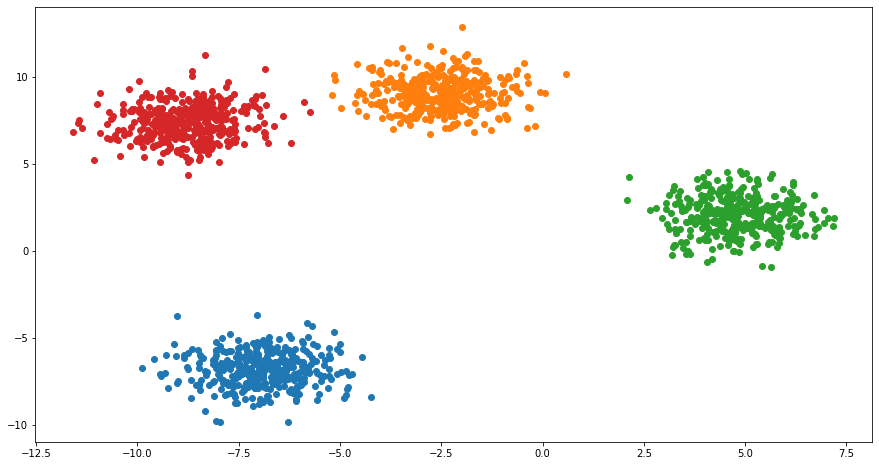

In [23]:
best_k = k[idx]

clustering = cluster.KMeans(n_clusters=best_k, random_state=42).fit(X)
labels = clustering.labels_

x = blobs[0][:,0]
y = blobs[0][:,1]

for l in range(max(labels)+1):
  xl = x[labels == l]
  yl = y[labels == l]
  plt.plot(xl, yl, 'o')
plt.show()